In [1]:
# N_simulation
from __future__ import division
import numpy as np
from scipy.integrate import odeint
from matplotlib.pylab import *
import matplotlib.pyplot as plt
import pandas as pd # to read excel
%matplotlib inline

# from datetime import datetime

In [2]:
xl = pd.ExcelFile('../data/input_format.xlsx')
df2 = xl.parse('500.3.5.168')


# which parameters? and values we read? if you want to print, uncomment:
# print(df.iloc[:][0],df.iloc[:][1])

# assigmment of parameters to values: 
# for key,val in zip(df1.iloc[:][0],df1.iloc[:][1]):
#     exec(key + '=val')
#     print(key,val)

In [3]:
df2.head()

,day i,day f,sleeve,parameter,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,22.07.19,12.08.19,1.0,Time,25.07.19 10:00,29.07.19 20:30,01.08.19 12:45,05.08.19 16:15,06.08.19 12:00,07.08.19 09:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Next,NaN,170.705,NaN,NaN,246.388,175.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Time,22.07.19 15:00,23.07.19 14:00,29.07.19 21:45,04.08.19 13:30,05.08.19 17:15,08.08.19 09:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Nint,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Time,22.07.19 15:00,23.07.19 14:00,23.07.19 14:01,24.07.19 09:30,25.07.19 10:00,28.07.19 09:30,...,04.08.19 13:30,04.08.19 13:31,05.08.19 17:15,05.08.19 17:16,06.08.19 12:30,07.08.19 13:00,08.08.19 09:30,08.08.19 09:31,11.08.19 09:30,12.08.19 13:00


In [4]:
df2.tail()

,day i,day f,sleeve,parameter,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
75,NaN,NaN,NaN,Next,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,Time,06.05.19 13:30,06.05.19 13:30,20.05.19 12:00,27.05.19 12:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,Nint,2.05476,1.51899,2.40742,3.11206,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,Time,06.05.19 13:30,13.05.19 12:00,13.05.19 12:01,20.05.19 12:00,20.05.19 12:01,27.05.19 12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,m,0.147,0.492,0.153,0.324,0.15,0.243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# find out how many experiments are in the file
n_exp = df2['day i'].dropna().shape[0] # number of items that have day i property and not NaN

# it should be equal to the number of day f - just for a test. will pop an error if the file is corrupted
assert (n_exp == df2['day f'].dropna().shape[0])

print('N of experiments = {}'.format(n_exp))

N of experiments = 12


In [6]:
day_i = df2['day i'].dropna()
day_i.astype('S')

0     b'22.07.19'
7     b'22.07.19'
14    b'22.07.19'
21    b'22.07.19'
28    b'22.07.19'
35    b'22.07.19'
42    b'22.07.19'
49    b'22.07.19'
56    b'22.07.19'
62    b'06.05.19'
68    b'06.05.19'
74    b'06.05.19'
Name: day i, dtype: bytes64

In [7]:
# find out the sleeve number in each experiment
sleeves = df2['sleeve'].dropna().astype(int)
for s in sleeves:
    print('sleeve {}'.format(s))


sleeve 1
sleeve 2
sleeve 3
sleeve 4
sleeve 5
sleeve 6
sleeve 7
sleeve 8
sleeve 9
sleeve 7
sleeve 8
sleeve 9


In [8]:
ind = df2.index[df2['parameter'] == 'Nint'] # find index of the Nint rows
print(ind) # print it for the reference, these are rows 2, 6 and 10

# small test
assert(len(ind) == n_exp) # if we found less Nint than experiments, then something is wrong


df2.iloc[ind[1],4:].dropna() # take the 2nd element of that index, i.e. 2nd experiment and show the data:

Int64Index([3, 10, 17, 24, 31, 38, 45, 52, 59, 65, 71, 77], dtype='int64')


Series([], Name: 10, dtype: object)

In [9]:
ind = df2.index[df2['parameter'] == 'm'] # find index of the mass was 
measurement_times = pd.to_datetime(df2.iloc[ind[0]-1,4:].dropna(),dayfirst=True)
print(measurement_times)

Unnamed: 4    2019-07-22 15:00:00
Unnamed: 5    2019-07-23 14:00:00
Unnamed: 6    2019-07-23 14:01:00
Unnamed: 7    2019-07-24 09:30:00
Unnamed: 8    2019-07-25 10:00:00
Unnamed: 9    2019-07-28 09:30:00
Unnamed: 10   2019-07-29 21:45:00
Unnamed: 11   2019-07-29 21:46:00
Unnamed: 12   2019-07-30 14:00:00
Unnamed: 13   2019-07-31 08:00:00
Unnamed: 14   2019-08-01 12:15:00
Unnamed: 15   2019-08-04 13:30:00
Unnamed: 16   2019-08-04 13:31:00
Unnamed: 17   2019-08-05 17:15:00
Unnamed: 18   2019-08-05 17:16:00
Unnamed: 19   2019-08-06 12:30:00
Unnamed: 20   2019-08-07 13:00:00
Unnamed: 21   2019-08-08 09:30:00
Unnamed: 22   2019-08-08 09:31:00
Unnamed: 23   2019-08-11 09:30:00
Unnamed: 24   2019-08-12 13:00:00
Name: 4, dtype: datetime64[ns]


No handles with labels found to put in legend.


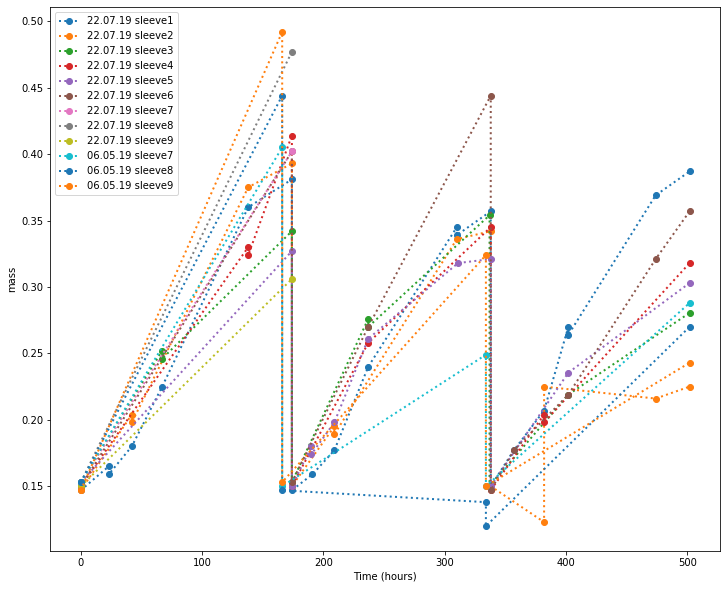

In [10]:
# plot all sleeves data
ind = df2.index[df2['parameter'] == 'm'] # find index of the mass was measured (this is the only data available so far)
# small test
assert(len(ind) == n_exp) # if we found less Nint than experiments, then something is wrong



fig,ax = plt.subplots(figsize=(12,10))

plt.legend()
plt.xlabel('Time')
plt.ylabel('mass');

for counter,value in enumerate(ind):
    m = df2.iloc[value,4:].dropna()
    measurement_times = pd.to_datetime(df2.iloc[value-1,4:].dropna(),dayfirst=True)
    hours = pd.Series((measurement_times - measurement_times[0]).astype('timedelta64[h]'))
    label = '{} sleeve{:d}'.format(day_i.iloc[counter],sleeves.iloc[counter])
    # print(counter, label)
    ax.plot(hours,m,':o',label=label,lw=2)
    
    
ax.legend()
ax.set_xlabel('Time (hours)')
ax.set_ylabel('mass');

In [11]:
hours

Unnamed: 4      0.0
Unnamed: 5    166.0
Unnamed: 6    166.0
Unnamed: 7    334.0
Unnamed: 8    334.0
Unnamed: 9    502.0
Name: 78, dtype: float64

In [12]:
label

'06.05.19 sleeve9'